In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 10]
import seaborn as sns
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# Read the excel sheet
df = pd.read_excel('data.xlsx')

In [3]:
df.shape

(19528, 7)

There are **19528** rows and **7** columns

In [4]:
df.columns

Index(['Date', 'Slide', 'Target Type', 'Target', 'Median', 'Well SD',
       'Well CV'],
      dtype='object')

The 7 columns are listed above. We shall be relying mainly on the 'Target Type', 'Target', 'Median', 'Well SD', 'Well CV' columns.

In [5]:
df.head()

,Date,Slide,Target Type,Target,Median,Well SD,Well CV
0,2016.07.27,1,0.1,Cy3 Lbled CT DNA Tgt,981.0,2357.38,1.37
1,2016.07.27,1,0.1,Cy3 Lbled CT DNA Tgt,1101.0,2243.53,1.15
2,2016.07.27,1,0.1,Cy3 Lbled CT DNA Tgt,1051.0,1687.48,1.01
3,2016.07.27,1,0.1,Cy3 Lbled CT DNA Tgt,807.0,2118.96,1.49
4,2016.07.27,1,1,Cy3 Lbled CT DNA Tgt,493.0,2350.22,1.71


In [6]:
df = df.drop(['Date'], axis=1)

Dropping the column 'Date' since it is not really relevant for our analysis

In [7]:
df = df.dropna()

In [8]:
df.shape

(19460, 6)

We see that the number of rows have decreased to **19460** (from the initial number of 19528). This is because some of the rows were not defined. Removing those rows.

In [9]:
df['Target'].unique()

array(['Cy3 Lbled CT DNA Tgt', 'NTC', 'Unlabeled CT DNA',
       'Cy3 Lbled CT RP', 'ATTO 2235_ 2248>AATTC', 'ATTO 2235_ 2249del15',
       'ATTO 2236_ 2250del15', 'ATTO 2238_ 2252del15',
       'ATTO 2240_ 2257del18', 'ATTO EGFR WT DNA', 'ATTO miR-21 DNA',
       'ATTO miR-374a', 'ATTO miR-3913', 'ATTO miR-655', 'ATTO EGFR DNA',
       'ATTO miR-21 in Sample1', 'ATTO miR-21 in Sample2',
       'ATTO miR-21 in Sample3', 'ATTO miR-21 in Sample4',
       'ATTO miR-21 in Sample5', 'ATTO miR-21 in Sample6', 'EGFR WT DNA',
       'CT DNA', 'Cy3 CT DNA', 'EWSR DNA', 'CT  DNA', 'COS166 DNA',
       'COS168 DNA', 'FLI DNA', 'EGFR DNA', 'COS166 RNA',
       'COS166 Lbld DNA', 'Labeled EGFR DNA', 'Labeled miR-21'],
      dtype=object)

In [10]:
len(df.Target.unique())

34

There are 34 distinct targets in our dataset. These are listed above

In [11]:
df['Target Type'].unique()

array([0.1, 1, 10, 0, 500, 100, 5, '1-Neg', '5-Neg', 25, '25-Neg', 400,
       200, 50, 12.5, 6.25, 3.125, 1.56, 0.78, 1000, 250, 125, 62.5,
       31.25, 15.625, 7.813, 3.906, 1.953, 1.563, 0.781, 0.391, 0.195,
       0.098, 0.049, 0.024, '10-Neg', 0.01, 0.001, 0.0001, 1e-05],
      dtype=object)

In [12]:
len(df['Target Type'].unique())

40

There are 40 distinct Target Types in our dataset. These are listed above. These are the numerical values associated with each Target.

In [13]:
df_n = df[df['Target Type'].str.contains('Neg') == True]

In [14]:
df_noise = df[df['Target Type'] == 0]

In [15]:
df_p = pd.concat([df, df_n]).drop_duplicates(keep=False)
df_p = pd.concat([df_p, df_noise]).drop_duplicates(keep=False)

In [16]:
print(df_p.shape, df_n.shape, df_noise.shape)

(11419, 6) (6640, 6) (1401, 6)


Segregated the values into 3 categories:
- *df_p represents* the positive values
- *df_n represents* the negative values
- *df_noise respresents* the background (0) values

Each of these dataframes contain all the 6 columns

### Data Visualization

We shall start by visualizing the entries for *df_p* (the positive values in our dataset).

In [17]:
df_p.describe()

,Median,Well SD,Well CV
count,11419.000000,11419.000000,11419.000000
mean,12846.689290,4204.215831,0.634027
std,15494.054248,4327.593552,0.837670
min,0.000000,0.000000,0.000000
25%,1783.000000,1110.000000,0.270000
50%,7159.000000,2788.740000,0.390000
75%,17817.000000,5904.565000,0.630000
max,65535.000000,29599.020000,23.910000


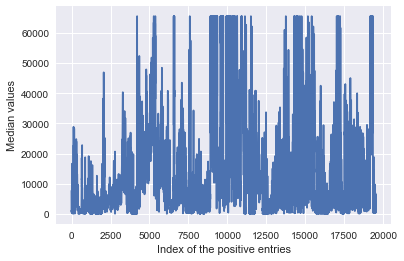

In [18]:
plt.plot(df_p['Median'])
plt.xlabel('Index of the positive entries')
plt.ylabel('Median values')
plt.show()

Simply plotting the "Median" values for our positive entries does not convey anything useful.

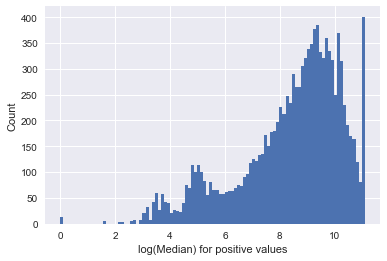

In [19]:
plt.hist(np.log(df_p['Median'] + 1), bins=100)
plt.xlabel('log(Median) for positive values')
plt.ylabel('Count')
plt.show()

The histogram above divides the log(Median) values into frequencies. We're using log(Median) instead of simple Median because binning is 
easily visualized. The histogram clearly shows that most of the values are observed between 4 and 11.
There are other interesting conclusions which can be drawn from this histogram such as:
    1. A spike is observed at the end, ie: most of the values lie in the end bin (close to 400).
    2. The plot is not exactly a normal distribution (which is usually the case with most datasets).


In [20]:
df_p['Log Median'] = np.log(df_p['Median'] + 1)

Adding an additional column 'Log Median' for our future analysis.

In [21]:
df_p_group = df_p.groupby(['Target']).mean()

In [22]:
df_p_group

,Median,Well SD,Well CV,Log Median
Target,,,,
ATTO 2235_ 2248>AATTC,2295.507143,1349.822143,0.668429,7.008123
ATTO 2235_ 2249del15,2061.342857,1096.106286,0.766286,6.663788
ATTO 2236_ 2250del15,2424.442857,1677.321714,0.798429,7.079886
ATTO 2238_ 2252del15,2413.507143,1185.294286,0.508571,7.580657
ATTO 2240_ 2257del18,2718.921429,1447.479143,0.592429,7.559618
ATTO EGFR WT DNA,14003.847174,6203.508143,0.543666,9.005142
ATTO miR-21 DNA,9687.879524,3452.982358,0.602771,8.010026
ATTO miR-21 in Sample1,19426.895833,6580.737500,0.365417,9.820974
ATTO miR-21 in Sample2,20099.354167,6823.163750,0.363750,9.841291


The values above are the 'Average' values for the different Target types we have. This action is performed for the columns 'Median', 'Well SD', 'Well CV', 'Log Median'.
Let's plot these values!!

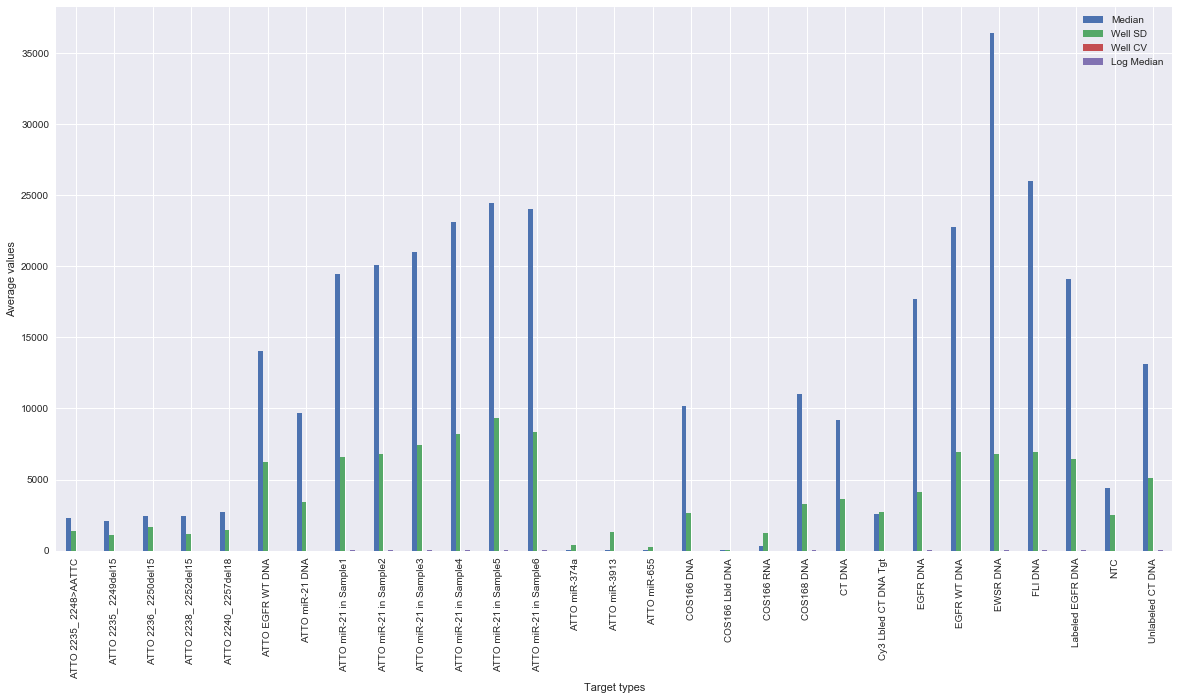

In [23]:
plt.rcParams['figure.figsize'] = [20,10]
df_p_group.plot(kind='bar')
plt.xlabel('Target types')
plt.ylabel('Average values')

The plot above shows the 'Median', 'Well SD', 'Well CV' and 'Log Median' values for each of the Target types in our positive entries. In this plot 'Well CV' and 'Log Median' is not clearly visible, which we shall look into individually. \
This plot has intesting distribution observations about our dataset.

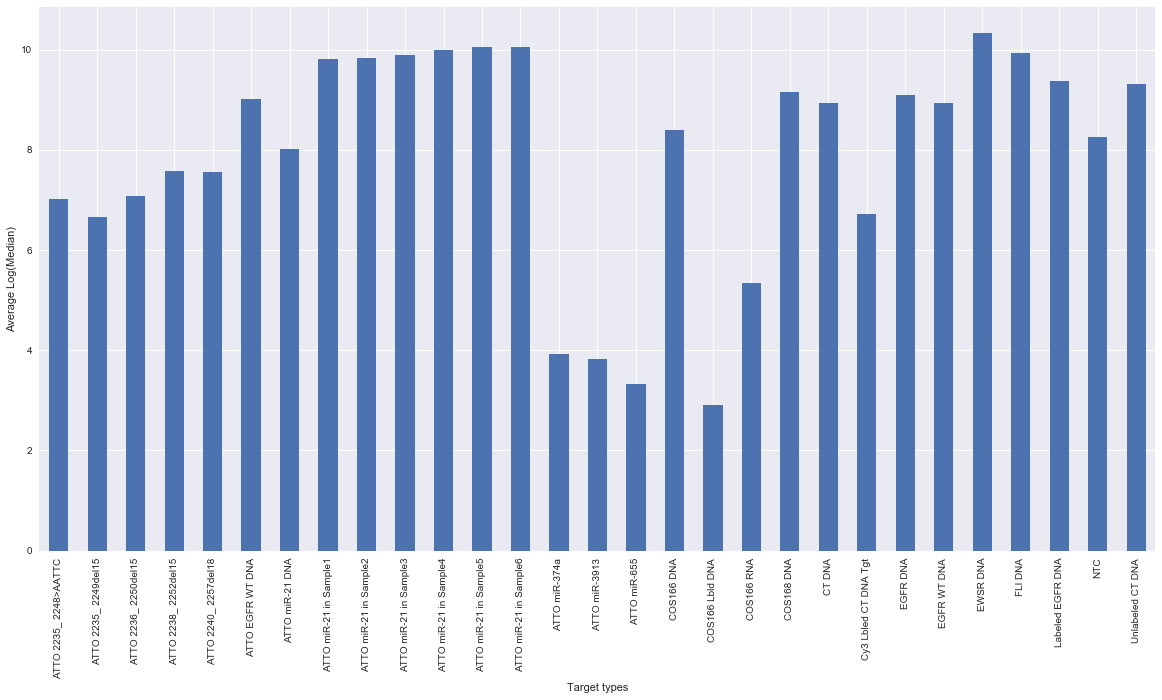

In [24]:
plt.rcParams['figure.figsize'] = [20,10]
df_p_group['Log Median'].plot(kind='bar')
plt.xlabel('Target types')
plt.ylabel('Average Log(Median)')

Zooming in to just the Log(Median) values for the positive entries in our dataset.